In [17]:
import numpy as np

# 定義 XOR 數據集
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y = np.array([1, -1, -1, 1])

# 定義二次特徵變換
def phi(x):
    return np.array([1, x[0], x[1], x[0]**2, x[0]*x[1], x[1]**2])

# 構建特徵矩陣
X_poly = np.array([phi(x) for x in X])

# 求解權重向量
w, residuals, rank, s = np.linalg.lstsq(X_poly, y, rcond=None)

# 輸出結果
print("權重向量 w:", w)

# 檢查結果
def check_decision_boundary(w, X, y):
    for x, label in zip(X, y):
        transformed_x = phi(x)
        decision_value = np.dot(w, transformed_x)
        print(f"點 {x} 的決策值: {decision_value}, 真實標籤: {label}, 判斷結果: {np.sign(decision_value) == label}")

check_decision_boundary(w, X, y)


權重向量 w: [-1.11022302e-16  3.81275242e-16 -9.05695430e-17  6.20861229e-17
  1.00000000e+00  6.20861229e-17]
點 [1 1] 的決策值: 1.0000000000000002, 真實標籤: 1, 判斷結果: True
點 [ 1 -1] 的決策值: -0.9999999999999994, 真實標籤: -1, 判斷結果: True
點 [-1  1] 的決策值: -1.0000000000000004, 真實標籤: -1, 判斷結果: True
點 [-1 -1] 的決策值: 0.9999999999999998, 真實標籤: 1, 判斷結果: True


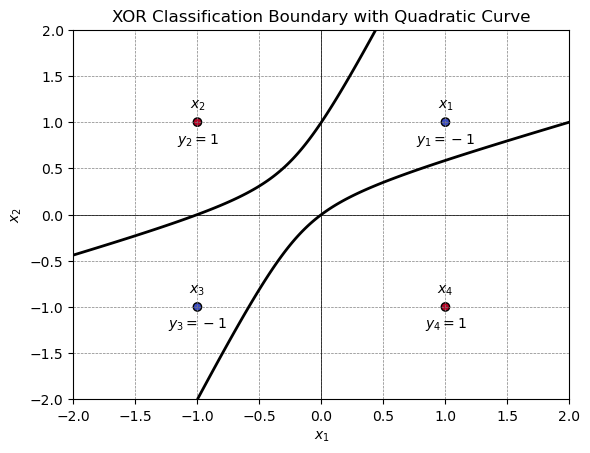

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 定義 XOR 數據集
X = np.array([[1, 1], [-1, 1], [-1, -1], [1, -1]])
y = np.array([-1, 1, -1, 1])

# 定義二次曲線方程
def quadratic_boundary(x1, x2):
    return x1 - x2 + x1**2 - 3*x1*x2 + x2**2
    # return -1.11022302e-16 + 3.81275242e-16*x1 + -9.05695430e-17 * x2 +  6.20861229e-17*x1**2 +1.00000000e+00 *x1*x2+  6.20861229e-17*x2**2

# 創建網格點
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))

# 計算決策邊界
Z = quadratic_boundary(xx1, xx2)

# 繪製分類邊界
plt.contour(xx1, xx2, Z, levels=[0], linewidths=2, colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

# 添加數據點的標籤
for i, txt in enumerate(['$x_1$', '$x_2$', '$x_3$', '$x_4$']):
    plt.annotate(txt, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'$y_{{{i+1}}} = {y[i]}$', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('XOR Classification Boundary with Quadratic Curve')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()
